# Landmarks Classifier Asia V1
アジアの著名なランドマーク識別器の推論サンプル<br>
アジア以外の識別器は以下を参照。

|  Continent  |  Module  |
| ---- | ---- |
|  Africa  |  [landmarks_classifier_africa](https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_africa_V1)  |
|  Asia  |  [landmarks_classifier_asia](https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_asia_V1)  |
|  Europe  |  [landmarks_classifier_europe](https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_europe_V1)  |
|  North America  |  [landmarks_classifier_north_america](https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_north_america_V1)  |
|  South America  |  [landmarks_classifier_south_america](https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_south_america_V1)  |
|  Oceania, Antarctica  |  [landmarks_classifier_oceania_antarctica](https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_oceania_antarctica_V1)  |

# パッケージインストール

In [1]:
!pip install \
    tensorflow==2.7.0 \
    tensorflow-hub==0.12.0 \
    opencv-python==4.5.4.60 \
    matplotlib==3.2.2

     |████████████████████████████████| 60.3 MB 57 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# サンプル画像ダウンロード

In [2]:
!wget "https://www.pakutaso.com/shared/img/thumb/kaminarimon_TP_V4.jpg" -O sample.jpg

--2022-01-24 01:04:08--  https://www.pakutaso.com/shared/img/thumb/kaminarimon_TP_V4.jpg
Resolving www.pakutaso.com (www.pakutaso.com)... 180.235.251.31
Connecting to www.pakutaso.com (www.pakutaso.com)|180.235.251.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239571 (234K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>] 233.96K   498KB/s    in 0.5s    

2022-01-24 01:04:10 (498 KB/s) - ‘sample.jpg’ saved [239571/239571]



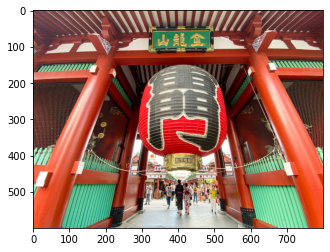

In [3]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('sample.jpg')
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

# TensorFlow Hub モジュールロード

In [4]:
import tensorflow_hub as hub

classifier = hub.KerasLayer(
    'https://tfhub.dev/google/on_device_vision/classifier/landmarks_classifier_asia_V1/1',
    output_key='predictions:logits'
)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


# 推論

In [5]:
import cv2
import numpy as np
import tensorflow as tf

# 画像読み込み
image = cv2.imread('sample.jpg')

# リサイズ
resize_image = cv2.resize(image, (321, 321))

# 正規化
resize_image = cv2.cvtColor(resize_image, cv2.COLOR_BGR2RGB) / 255.0

# 形状変更
resize_image = np.expand_dims(resize_image, axis=0)

# tensor形式へ変換
tensor = tf.convert_to_tensor(resize_image, dtype=tf.float32)

In [6]:
# 推論
result = classifier(tensor)

# スコア降順にソート
sorted_result = np.argsort(-result[0])

# 結果確認

In [7]:
# ラベルマップダウンロード
!wget https://www.gstatic.com/aihub/tfhub/labelmaps/landmarks_classifier_asia_V1_label_map.csv

--2022-01-24 01:04:18--  https://www.gstatic.com/aihub/tfhub/labelmaps/landmarks_classifier_asia_V1_label_map.csv
Resolving www.gstatic.com (www.gstatic.com)... 74.125.141.94, 2607:f8b0:400c:c06::5e
Connecting to www.gstatic.com (www.gstatic.com)|74.125.141.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2612288 (2.5M) [text/csv]
Saving to: ‘landmarks_classifier_asia_V1_label_map.csv’

landmarks_classifie 100%[===================>]   2.49M  --.-KB/s    in 0.1s    

2022-01-24 01:04:18 (25.2 MB/s) - ‘landmarks_classifier_asia_V1_label_map.csv’ saved [2612288/2612288]



In [8]:
import pandas as pd

# ラベルマップ読み込み
label_map = pd.read_csv('landmarks_classifier_asia_V1_label_map.csv')
label_map.head()

,id,name
0,0,Bagha Shahi Mosque
1,1,City Palace
2,2,The Immaculate Conception Cathedral of Cubao
3,3,City of David
4,4,Noor Mahal


In [9]:
# トップ10表示
top_n = 10

for index in range(top_n):
    id = sorted_result[index]
    name = label_map[label_map['id'] == id]['name'].values[0]
    print(id, name)

970 Kaminarimon Gate Senso-ji
26246 Kaminarimon Gate Senso-ji
45611 Kaminarimon Gate Senso-ji
43228 Kaminarimon Gate Senso-ji
36476 Kaminarimon Gate Senso-ji
77401 Wenwu Temple
11741 Xianxian Mosque
83948 China Pavilion
5516 Ibn Battuta Mall
3634 Sensō-ji


# ONNX変換

In [ ]:
!pip install -U tf2onnx

In [11]:
import tensorflow as tf

model = tf.keras.Sequential([
    classifier,
])

input_shape = (None, 321, 321, 3)
model.build(input_shape)

model.save('landmarks_classifier_asia_v1')

INFO:tensorflow:Assets written to: landmarks_classifier_asia_v1/assets


INFO:tensorflow:Assets written to: landmarks_classifier_asia_v1/assets


In [12]:
!python -m tf2onnx.convert \
    --saved-model 'landmarks_classifier_asia_v1' \
    --output landmarks_classifier_asia_v1.onnx

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-01-24 01:04:33,021 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-01-24 01:04:33,970 - INFO - Signatures found in model: [serving_default].
2022-01-24 01:04:33,970 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-01-24 01:04:33,970 - INFO - Output names: ['keras_layer']
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-01-24 01:04:36,484 - WARNING - From /usr/local/lib/python3.7/dist-packages/tf2onnx/tf_loader.py:706: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-01-24 01:04:37,956 - INFO - Using

# ONNX推論テスト

In [ ]:
!pip install onnxruntime

In [14]:
import onnxruntime

# ONNXモデルロード
onnx_session = onnxruntime.InferenceSession('landmarks_classifier_asia_v1.onnx')

input_name = onnx_session.get_inputs()[0].name
output_name = onnx_session.get_outputs()[0].name

In [15]:
import cv2
import numpy as np
import tensorflow as tf

# 画像読み込み
image = cv2.imread('sample.jpg')

# リサイズ
resize_image = cv2.resize(image, (321, 321))

# 正規化
resize_image = cv2.cvtColor(resize_image, cv2.COLOR_BGR2RGB) / 255.0

# 形状変更
resize_image = np.expand_dims(resize_image, axis=0)

# tensor形式へ変換
tensor = tf.convert_to_tensor(resize_image, dtype=tf.float32)

In [16]:
import cv2 as cv
import numpy as np

# 画像読み込み
image = cv2.imread('sample.jpg')

# 前処理
resize_image = cv2.resize(image, (321, 321))
x = cv.cvtColor(resize_image, cv.COLOR_BGR2RGB) / 255.0
x = np.expand_dims(x, axis=0)
x = np.array(x, dtype=np.float32)

# 推論
onnx_result = onnx_session.run([output_name], {input_name: x})

# 後処理
sorted_result = np.argsort(-onnx_result[0][0])

In [17]:
# トップ10表示
top_n = 10

for index in range(top_n):
    id = sorted_result[index]
    name = label_map[label_map['id'] == id]['name'].values[0]
    print(id, name)

970 Kaminarimon Gate Senso-ji
26246 Kaminarimon Gate Senso-ji
45611 Kaminarimon Gate Senso-ji
43228 Kaminarimon Gate Senso-ji
36476 Kaminarimon Gate Senso-ji
77401 Wenwu Temple
11741 Xianxian Mosque
83948 China Pavilion
5516 Ibn Battuta Mall
3634 Sensō-ji
